In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

# Load the dataset for the model using all the 7 categories of products

<font size = 4> The size of the dataset is too big to be loaded all in once, so each file .json must be saved in another directory after being modified (the directory and the files are identified by the arbitrary number '112723'). We apply VADER score sentiment analysis on the text reviews and data cleaning. <font>

In [105]:
def sanitize_text_reviews(df):
    df['clean_text_reviews'] = df['reviewText'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def sanitize_text_summary(df):
    df['clean_text_summary'] = df['summary'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def to_tidy_format_reviews(df):
    tidy_df_reviews = (
        df["clean_text_reviews"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_reviews": "word"})
    )
    return tidy_df_reviews

def to_tidy_format_summary(df):
    tidy_df_summary = (
        df["clean_text_summary"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_summary": "word"})
    )
    return tidy_df_summary

def add_polarity_reviews(df, tidy_df_reviews):
    df["polarity_reviews"] = (
        tidy_df_reviews
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

def add_polarity_summary(df, tidy_df_summary):
    df["polarity_summary"] = (
        tidy_df_summary
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

print(''.join(open("../data/vader_lexicon.txt").readlines()[:10]))
sent = pd.read_csv("../data/vader_lexicon.txt", sep='\t', header = None).loc[:, [0,1]].rename(columns={0: "token", 1: "polarity"}).set_index('token')
sent.head()

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [106]:
df = pd.read_json("../data/Original/Patio_Lawn_and_Garden_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin' , 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Lawn_112723.json")

In [107]:
df = pd.read_json("../data/Original/Sports_and_Outdoors_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Sports_112723.json")

In [108]:
df = pd.read_json("../data/Original/Tools_and_Home_Improvement_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Tools_112723.json")

In [109]:
df = pd.read_json("../data/Original/Toys_and_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Toys_112723.json")

In [110]:
df = pd.read_json("../data/Original/Video_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin',  'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/VideoGames_112723.json")

In [111]:
df = pd.read_json("../data/Original/Movies_and_TV_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Movies_112723.json")

In [112]:
df = pd.read_json("../data/Original/Kindle_Store_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Kindle_112723.json")

In [113]:
df = pd.read_json("../data/112723/Lawn_112723.json")
df2 = pd.read_json("../data/112723/Sports_112723.json")
df3 = pd.read_json("../data/112723/Tools_112723.json")
df4 = pd.read_json("../data/112723/Toys_112723.json")
df5 = pd.read_json("../data/112723/VideoGames_112723.json")
df6 = pd.read_json("../data/112723/Movies_112723.json")
df7 = pd.read_json("../data/112723/Kindle_112723.json")

In [128]:
df.head(2)

,year,month,day,asin,overall,verified,reviewerID,reviewerName,reviewText,summary,vote,polarity_reviews,polarity_summary,length of review
0,2011,12,11,9539723809,5,True,AUVPE2KEXBJVT,T. E. Kainz,I don't spend a lot on my flags because they r...,Good quality for the price,2,5.1,1.9,576.0
1,2011,7,30,9539723809,5,True,A2F6GES1MBOFXS,BluesJamJim,"Super fast processing and shipping, if you are...",3'x5' Colorado State flag,None,6.7,0.0,139.0


In [129]:
df.columns

Index(['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID',
       'reviewerName', 'reviewText', 'summary', 'vote', 'polarity_reviews',
       'polarity_summary', 'length of review'],
      dtype='object')

# Model 3 with OHE

In [130]:
# ohe features of interest
# len review
# try all categories
# merge df together adding column 'category'
# OHE 'category'
# model with this new df
# regularization

In [131]:
df['category'] = 'Lawn'
df2['category'] = 'Sports'
df3['category'] = 'Tools'
df4['category'] = 'Toys'
df5['category'] = 'VideoGames'
df6['category'] = 'Movies'
df7['category'] = 'Kindle'
merged_df = pd.concat([df, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [132]:
def train_val_split(data):
    """ 
    Takes in a DataFrame `data` and randomly splits it into two smaller DataFrames 
    named `train` and `validation` with 80% and 20% of the data, respectively. 
    """
    
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    test_indexes = shuffled_indices[0:int(len(shuffled_indices)*0.8)]
    validation_indexes = shuffled_indices[int(len(shuffled_indices)*0.8):]
    train = data.iloc[test_indexes]
    validation = data.iloc[validation_indexes]
   
    return train, validation

In [133]:
merged_df.columns

Index(['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID',
       'reviewerName', 'reviewText', 'summary', 'vote', 'polarity_reviews',
       'polarity_summary', 'length of review', 'category'],
      dtype='object')

In [134]:
from sklearn import linear_model as lm
from sklearn.preprocessing import OneHotEncoder

def train_val_split(data):
    """ 
    Takes in a DataFrame `data` and randomly splits it into two smaller DataFrames 
    named `train` and `validation` with 80% and 20% of the data, respectively. 
    """
    
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    test_indexes = shuffled_indices[0:int(len(shuffled_indices)*0.8)]
    validation_indexes = shuffled_indices[int(len(shuffled_indices)*0.8):]
    train = data.iloc[test_indexes]
    validation = data.iloc[validation_indexes]
   
    return train, validation

def one_hot_encode(data):
    """
    Return the one-hot encoded DataFrame of our input data.
    
    Parameters
    -----------
    data: A DataFrame that may include non-numerical features.
    
    Returns
    -----------
    A one-hot encoded DataFrame that only contains numeric features.
    
    """

    #cat = ['Roof Material', 'in_expensive_neighborhood', 'Central Air', 'Repair Condition'] # Commented out, but it worked
    cat = ['category', 'verified', 'overall']
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[cat])
    
    cat_data = oh_enc.transform(data[cat]).toarray()
    
    cat_df = pd.DataFrame(data=cat_data, columns=oh_enc.get_feature_names_out(), index=data.index)
    
    return data.join(cat_df).drop(columns=cat)

In [135]:
merged_df_fit = merged_df[['year', 'overall', 'verified', 'vote', 'polarity_summary', 'length of review', 'category']]
merged_df_fit['vote'] = merged_df_fit['vote'].str.replace('nan', '0').fillna('0').str.replace(',', '')
merged_df_fit['vote'] = merged_df_fit['vote'].astype(str)
merged_df_fit = merged_df_fit.dropna()
X = merged_df[['year', 'overall', 'verified', 'vote', 'polarity_summary', 'length of review', 'category']]
Y = merged_df[['polarity_reviews']]

/tmp/ipykernel_132043/3969962488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_fit['vote'] = merged_df_fit['vote'].str.replace('nan', '0').fillna('0').str.replace(',', '')
/tmp/ipykernel_132043/3969962488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_fit['vote'] = merged_df_fit['vote'].astype(str)


In [136]:
X_ohe = one_hot_encode(X)
X_norm = X_ohe.drop(['category_Lawn', 'verified_True', 'overall_4', 'vote'], axis=1)
X_norm.columns

Index(['year', 'polarity_summary', 'length of review', 'category_Kindle',
       'category_Movies', 'category_Sports', 'category_Tools', 'category_Toys',
       'category_VideoGames', 'verified_False', 'overall_1', 'overall_2',
       'overall_3', 'overall_5'],
      dtype='object')

In [137]:
X_norm = X_norm.fillna(0)

In [138]:
X_norm['polarity_summary'] = (X_norm['polarity_summary'] - X_norm['polarity_summary'].mean())/np.std(X_norm['polarity_summary'])

In [139]:
X_norm['length of review'] = (X_norm['length of review'] - X_norm['length of review'].mean())/np.std(X_norm['length of review'])

In [140]:
X_norm['year'] = (X_norm['year'] - X_norm['year'].mean())/np.std(X_norm['year'])

In [141]:
X_norm.head()

,year,polarity_summary,length of review,category_Kindle,category_Movies,category_Sports,category_Tools,category_Toys,category_VideoGames,verified_False,overall_1,overall_2,overall_3,overall_5
0,-1.420200,0.324860,0.318028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.420200,-0.687433,-0.320249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.502868,-0.687433,-0.406424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.118255,-0.687433,-0.466308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.118255,-0.687433,-0.477993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
Y

,polarity_reviews
0,5.1
1,6.7
2,6.1
3,6.3
4,3.1
...,...
13668731,1.7
13668732,-8.9
13668733,-4.8
13668734,7.6


In [143]:
X_norm.columns

Index(['year', 'polarity_summary', 'length of review', 'category_Kindle',
       'category_Movies', 'category_Sports', 'category_Tools', 'category_Toys',
       'category_VideoGames', 'verified_False', 'overall_1', 'overall_2',
       'overall_3', 'overall_5'],
      dtype='object')

In [144]:
X_norm.shape

(13668736, 14)

In [145]:
Y.shape

(13668736, 1)

## Using Train/Test splitting for the model

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.33, random_state=42)


In [147]:
ohe_model = lm.LinearRegression(fit_intercept=True) #Tell sklearn to not add an additional bias column. Why?
ohe_model.fit(X_train, y_train)

LinearRegression()

In [148]:
print(f"Resulting RMSE: {np.sqrt(np.mean((y_test - ohe_model.predict(X_test)) ** 2))}")

Resulting RMSE: 7.306375446919241


Text(0, 0.5, 'error')

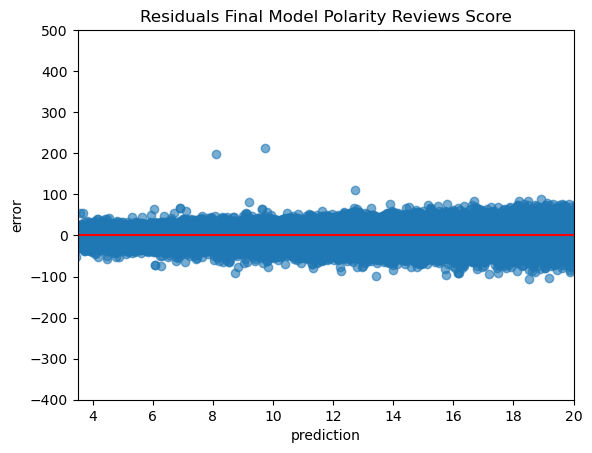

In [149]:
X = X_test
y = y_test

#model =  lm.LinearRegression().fit(X, y) 

prediction = ohe_model.predict(X)
error = y - prediction

fig = plt.scatter(x=prediction, y=error, alpha = 0.6)
plt.xlim(3.5,20)
plt.ylim(-400, 500)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Final Model Polarity Reviews Score")
plt.xlabel("prediction")
plt.ylabel("error")

In [150]:
decrease = (1 - np.std(error)/np.std(merged_df['polarity_reviews']))*100

print(f"     SD(errors): {np.std(error)}")
print(f"SD(polarity_reviews): {np.std(merged_df['polarity_reviews'])}")
print(f"size of error decreased by {decrease:} %")

# plt.scatter(x=prediction, y=error)
# plt.axhline(y=0, color='red')
# plt.xlabel("prediction")
# plt.ylabel("error")
# plt.title("Residual plot")

mse_model = np.mean(error**2)
mse_avg = np.mean((df7["polarity_reviews"].mean() - y)**2)
rmse_model = np.sqrt(mse_model)
rmse_avg = np.sqrt(mse_avg)

print(f"                  mse (model): {mse_model}                       rmse (model): {rmse_model} ")
print(f"mse (avg polarity of dataset): {mse_avg}       rmse (avg polarity of dataset): {rmse_avg} ")
percent_increase = ((1-(rmse_model)/rmse_avg))
print(f"rmse reduced by {percent_increase*100}%")

     SD(errors): polarity_reviews    7.306375
dtype: float64
SD(polarity_reviews): 9.319730244918459
size of error decreased by polarity_reviews    21.603147
dtype: float64 %
                  mse (model): 53.38312217134434                       rmse (model): 7.306375446919241 
mse (avg polarity of dataset): 99.51246401726274       rmse (avg polarity of dataset): 9.975593416797958 
rmse reduced by 26.7574855785923%


## Regularization

Using Lasso we don't have to drop columns for features that are One-Hot-Encoded (ohe) to guarantee that the matrix is nonsingular (that is, it has a determinant different from zero and it is therefore invertible). In fact, when using regularization we have always a nonsingular matrix even keeping all the ohe columns for each categorical feature to have them linearly independent. Moreover, when we alter the structure of the matrix we also change the model's parameters and therefore its preedictions. Dropping different columns for each categorical feature generates new set of parameters for the Lasso model. Our goal using regularization is to determine the best model but dropping different columns can lead to non-trivial different results. It is better to keep the matrix with all the columns for all the categorical features, and apply the Lasso model on it.

In [151]:
merged_df_fit = merged_df[['year', 'overall', 'verified', 'polarity_summary', 'length of review', 'category', 'polarity_reviews']]
merged_df_fit = merged_df_fit.dropna()
X = merged_df_fit[['year', 'overall', 'verified', 'polarity_summary', 'length of review', 'category']]
Y = merged_df_fit['polarity_reviews']
X_ohe = one_hot_encode(X)
X_ohe.columns

Index(['year', 'polarity_summary', 'length of review', 'category_Kindle',
       'category_Lawn', 'category_Movies', 'category_Sports', 'category_Tools',
       'category_Toys', 'category_VideoGames', 'verified_False',
       'verified_True', 'overall_1', 'overall_2', 'overall_3', 'overall_4',
       'overall_5'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, Y, test_size=0.33, random_state=42)

In [153]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) 
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

We confirm that the means of the features in the train set are all 0 and the SDs are all 1.

In [154]:
np.allclose(X_train_scaled.mean(axis=0), 0)

True

In [155]:
np.allclose(X_train_scaled.std(axis=0), 1)

True

To perform a lasso regression, we use the Lasso method in scikit-learn. We want to see how the coefficients for the features in the data frame change with alpha,  setting up a range of values for the regularization parameter and fit the lasso for each:

In [156]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

coefs = []
mses = []
alphas = np.arange(0.01, 8, 0.01)

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
    mses.append(mean_squared_error(y_test, model.predict(X_test_scaled)))

We can also plot the MSE as a function of alpha to see how it changes with the increase in the penalty:

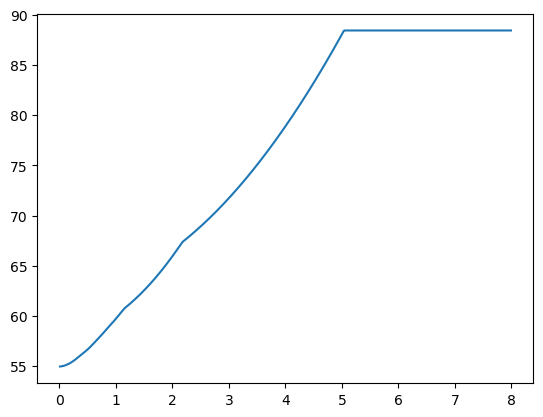

In [157]:
plt.plot(alphas, mses)

When reaches ~5, the penalty is so great that the lasso regression is fitting a constant model to the data, and that is why the MSE doesn’t change after this value of the hyper-parameter. How to choose alpha? We use cross-validation (CV):

In [158]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(
    alphas=np.arange(0.01, 1, 0.01), cv=5, max_iter=100000
)

We use the LassoCV method to perform 5-fold cross-validation to choose alpha:

In [159]:
lasso_best = lasso_cv_model.fit(X_train_scaled, y_train)

Cross-validation has chosen the following regularization parameter:

In [160]:
lasso_best.alpha_

0.01

Compute the MSE for predictions in the test set using this cross-validated model:

In [161]:
y_test_pred = lasso_best.predict(X_test_scaled)
mean_squared_error(y_test, y_test_pred)

54.974409328616005

How many coefficients are not 0?

In [162]:
sum(np.abs(lasso_best.coef_) > 0)

14

In [163]:
print(f'Test score: {lasso_best.score(X_test_scaled, y_test)}')

Test score: 0.378336996423693


In [164]:
print(f'Training score: {lasso_best.score(X_train_scaled, y_train)}')

Training score: 0.3803926978897263


## VADER score 

1) Hutto, Clayton, and Eric Gilbert. "Vader: A parsimonious rule-based model for sentiment analysis of social media text." Proceedings of the international AAAI conference on web and social media. Vol. 8. No. 1. 2014.

2) Bonta, Venkateswarlu, Nandhini Kumaresh, and N. Janardhan. "A comprehensive study on lexicon based approaches for sentiment analysis." Asian Journal of Computer Science and Technology 8.S2 (2019): 1-6.

3) Borg, Anton, and Martin Boldt. "Using VADER sentiment and SVM for predicting customer response sentiment." Expert Systems with Applications 162 (2020): 113746.

4)  Ulf Norinder & Petra Norinder (2022) Predicting Amazon customer reviews with deep confidence using deep learning and conformal prediction, Journal of Management Analytics, 9:1, 1-16, DOI: 10.1080/23270012.2022.2031324 

The third and fourth articles are the most important ones, it is literally what we did.